In [2]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████| 36.8k/36.8k [00:00<00:00, 19.8MB/s]

Extracting files...
Path to dataset files: /home/gitpod/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2


In [16]:
# Xem trong thư mục có những tệp nào
path = '/home/gitpod/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2'
all_files = os.listdir(path)
print("Các tệp trong /home/gitpod/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2 gồm: ")
for i in all_files:
    print(i)

Các tệp trong /home/gitpod/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2 gồm: 
2015.csv
2016.csv
2017.csv
2018.csv
2019.csv


In [78]:
# Đọc file csv bằng pd.read_csv
raw_2015 = pd.read_csv('/home/gitpod/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2015.csv')
raw_2016 = pd.read_csv('/home/gitpod/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2016.csv')
raw_2017 = pd.read_csv('/home/gitpod/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2017.csv')

# Happiness Score được tính toán dựa trên các chỉ số về:
- Economy
- Family
- Health
- Freedom
- Trust
- Generosity
* HappinessScore = Economic(GDPpercap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual

# .info()
- 2015: 12 col, 158 row
- 2016: 13 col, 157 row
- 2017: 12 col, 155 row

In [93]:
columns = raw_2017.columns.tolist()

In [94]:
columns[9], columns[10] = columns[10], columns[9]

In [95]:
raw_2017 = raw_2017[columns]

In [97]:
# Tạo hàm để kiểm tra xem header của các bảng đã giống nhau chưa
def is_same_header(df_list):
    header = list(df_list[0].columns)
    all_same = all(list(df.columns) == header for df in df_list)
    return all_same

In [98]:
# Kiểm tra raw list xem đã có same header chưa?
raw_list = [raw_2015, raw_2016, raw_2017]
is_same_header(raw_list)

False

In [71]:
# Tạo bảng mới chỉ gồm những cột mình cần
new_header = ['Country', 'Happiness Rank', 'Happiness Score',
      'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
new_2015 = pd.DataFrame(raw_2015,columns = new_header)
new_2016 = pd.DataFrame(raw_2016,columns = new_header)

In [99]:
new_2017 = raw_2017.drop(['Whisker.high' ,	'Whisker.low'], axis = 1)

In [100]:
new_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score',
      'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

In [101]:
# Kiểm tra new list xem đã có same header chưa?
new_list = [new_2015, new_2016, new_2017]
is_same_header(new_list)

True

In [102]:
new_2015['Year']=2015
new_2016['Year']=2016
new_2017['Year']=2017

In [105]:
# Nối các năm vào cùng 1 bảng
total = pd.concat([new_2015,new_2016,new_2017])

In [107]:
# Xem có giá trị trống không
total.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [ ]:
# Xong bước làm sạch dữ liệu ( •̀ ω •́ )y

In [122]:
# Lấy những cột cần lấy, đổi tên cột

rank_2015 = new_2015[['Country','Happiness Rank']]
rank_2016 = new_2016[['Country', 'Happiness Rank']]
rank_2017 = new_2017[['Country', 'Happiness Rank']]

In [133]:
# Merge các năm vào thành cùng 1 bảng

time_rank = rank_2015.merge(rank_2016, on = 'Country', how = 'inner').merge(rank_2017, on = 'Country', how = 'inner')

In [137]:
# Đổi tên các cột tương ứng với năm

time_rank = time_rank.rename(columns={'Happiness Rank_x':'Rank_2015','Happiness Rank_y':'Rank_2016','Happiness Rank':'Rank_2017'})

In [151]:
country = ['Vietnam']
country_rank = time_rank[time_rank['Country'].isin(country)]
country_rank

,Country,Rank_2015,Rank_2016,Rank_2017
70,Vietnam,75,96,94


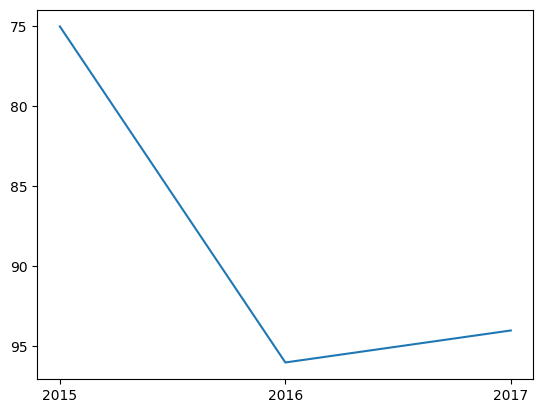

In [174]:
x = [2015,2016,2017]
y = country_rank[['Rank_2015', 'Rank_2016', 'Rank_2017']].values.flatten()
plt.gca().invert_yaxis()  # Đảo ngược trục y để rank 1 ở trên cùng
plt.xticks(x)  # Giá trị trên trục x chỉ giống những giá trị ở trong x (nếu không để tick thì sẽ bị 2015.25 2015.5 ... 2016)
plt.plot(x,y)
plt.show()